#  Δουλεύοντας με τον χρόνο στα `pandas`

Πάμε να δούμε κάποια δεδομένα για πωλήσεις σπιτιών. Τα δεδομένα είναι κάπως περίεργα, οπότε χρειάζονται καθάρισμα.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/home-sales.csv")

## Θα φτιάξουμε μια στήλη για το datetime 

In [38]:
df

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01
...,...,...,...,...,...,...,...,...,...,...,...
636,0,39.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-01-01
637,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-02-01
638,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-03-01
639,0,57.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-04-01


### Ιδανικά η ημερομηνία δεν πρέπει να είναι object, αλλά ημερομηνία

In [39]:
df.dtypes

is_adj          int64
val           float64
cat_code       object
cat_desc       object
cat_indent      int64
dt_code        object
dt_desc        object
dt_unit        object
geo_code       object
geo_desc       object
per_name       object
dtype: object

## Περισσότερες λεπτομέρειες για διαφορετικά format http://strftime.org/ 

http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [40]:
pd.to_datetime(df.per_name).head()

0   1963-01-01
1   1963-02-01
2   1963-03-01
3   1963-04-01
4   1963-05-01
Name: per_name, dtype: datetime64[ns]

### Με το %%time βλέπουμε πόση ώρα κάνει να εκτελεστεί μια εντολή

In [41]:
%%time
pd.to_datetime(df.per_name).head() 

CPU times: user 1.24 ms, sys: 26 µs, total: 1.26 ms
Wall time: 1.26 ms


0   1963-01-01
1   1963-02-01
2   1963-03-01
3   1963-04-01
4   1963-05-01
Name: per_name, dtype: datetime64[ns]

In [42]:
%%time
pd.to_datetime(df.per_name, format='%Y-%m-%d').head()

CPU times: user 1.86 ms, sys: 110 µs, total: 1.97 ms
Wall time: 1.93 ms


0   1963-01-01
1   1963-02-01
2   1963-03-01
3   1963-04-01
4   1963-05-01
Name: per_name, dtype: datetime64[ns]

In [43]:
df['date'] = pd.to_datetime(df.per_name, format='%Y-%m-%d')
df['date']

0     1963-01-01
1     1963-02-01
2     1963-03-01
3     1963-04-01
4     1963-05-01
         ...    
636   2016-01-01
637   2016-02-01
638   2016-03-01
639   2016-04-01
640   2016-05-01
Name: date, Length: 641, dtype: datetime64[ns]

In [44]:
df.dtypes

is_adj                 int64
val                  float64
cat_code              object
cat_desc              object
cat_indent             int64
dt_code               object
dt_desc               object
dt_unit               object
geo_code              object
geo_desc              object
per_name              object
date          datetime64[ns]
dtype: object

## Αλλάζουμε το ευρετήριο/index να είναι το datetime

Η πρώτη στήλη με το `0`, `1`, `2`, `3`, `4`μας είναι άχρηστη και εφόσον έχουμε την ημερομηνία θα βάλουμε αυτήν εκεί με την εντολή **.set_index** 

In [45]:
df.set_index('date' , inplace=True)

Σιγουρευτείτε ότι γράψατε `inplace=True` γιατί αλλιώς δεν θα σωθεί η αλλαγή, στην περίπτωσή μας το νέο index!

## Tώρα που το index είναι η ημερομηνία μπορούμε να διαλέξουμε γραμμές με βάση την ημερομηνία πολύ εύκολα


## Αλλά πριν από αυτό πάμε να θυμηθούμε τα list slices 


In [46]:
# λίστα από φρούτα
ranked_fruits = ('banana', 'orange', 'apple', 'blueberries', 'strawberries')

In [47]:
#  Ξεκινήστε από την αρχή, πάρτε τα δύο πρώτα ...
ranked_fruits[:2]

('banana', 'orange')

In [48]:
# Ξεκινήστε από το δύο, πάρτε μέχρι το τέταρτο στοιχείο
ranked_fruits[2:4]

('apple', 'blueberries')

In [49]:
# Ξεκινώντας από το τρίτο στοιχείο, πάρτε όλα τα υπόλοιπα
ranked_fruits[3:]

('blueberries', 'strawberries')

### Γραμμές μετά από μια συγκεκριμένη ημερομηνία

In [50]:
df['1970':]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1970-01-01,0,34.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-01-01
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01
1970-04-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-04-01
1970-05-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-05-01
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,0,39.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-01-01
2016-02-01,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-02-01
2016-03-01,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-03-01


### Γραμμές μεταξύ μιας συγκεκριμένης ημερομηνίας

In [51]:
df['1970':'1975'].head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1970-01-01,0,34.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-01-01
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01
1970-04-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-04-01
1970-05-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-05-01


# Από Φεβ. του 1973 μέχρι Ιούλιο του 1975

In [52]:
df['1970-02': '1970-07']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01
1970-04-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-04-01
1970-05-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-05-01
1970-06-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-06-01
1970-07-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-07-01


In [53]:
#Sum 

In [54]:
df['1970':'1979'].val.sum()

6557.0

In [55]:
df['1980':'1989'].val.sum()

6088.0

### πώς μπορούμε να επιλέξουμε κάθε Φεβ

In [73]:
df[df.index.month == 2]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1964-02-01,0,46.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-02-01
1965-02-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-02-01
1966-02-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1966-02-01
1967-02-01,0,32.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1967-02-01
1968-02-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1968-02-01
1969-02-01,0,40.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1969-02-01
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1971-02-01,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1971-02-01


### Συγκεκριμένους μήνες

In [61]:
df[df.index.month.isin([6,7,8])]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-06-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-06-01
1963-07-01,0,62.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-07-01
1963-08-01,0,56.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-08-01
1964-06-01,0,53.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-06-01
1964-07-01,0,54.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-07-01
...,...,...,...,...,...,...,...,...,...,...,...
2014-07-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2014-07-01
2014-08-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2014-08-01
2015-06-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2015-06-01


# Έχουμε πλέον time series τα οποία μπορούμε να οπτικοποιήσουμε!

Πάντα όταν χρησιμοποιούμε το `.plot`, τα Pandas θα χρησιμοποιήσουν αυτόματα το index (η ημερομηνία) ως άξονα x για εσάς. Αυτό είναι τέλειο γιατί εσείς δεν έχετε να κάνετε τίποτα 

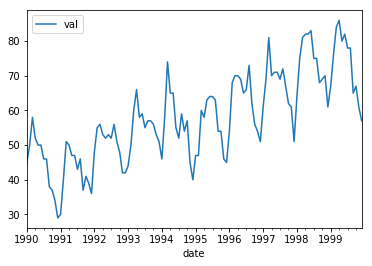

In [62]:
df['1990':'1999'].plot(y='val')

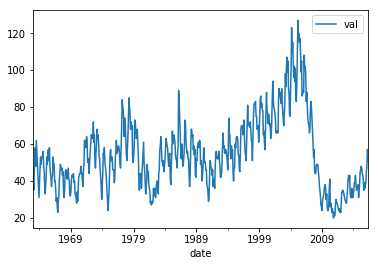

In [63]:
df.plot(y='val')

## Ομαδοποίηση με το resample και όχι με το groupby

Φαίνεται ότι κάτι κακό θα μπορούσε να έχει συμβεί στη βιομηχανία της στέγασης σε κάποιο σημείο. Ίσως θέλουμε να δούμε μερικούς αριθμούς αντί για ένα γράφημα; Για να κάνουμε συγκεντρωτικά στατιστικά στοιχεία σχετικά με τις χρονοσειρές σε pandas χρησιμοποιούμε μια μέθοδο που ονομάζεται `.resample()` και του ζητάμε να κάνει **group τα δεδομένα ανά χρονιά.**

Για να ομοαδοποιήσουμε με βάση τον χρόνο θέλουμε ένα **special κώδικα**. Εγώ τον πήρα από εδώ http://stackoverflow.com/a/17001474 

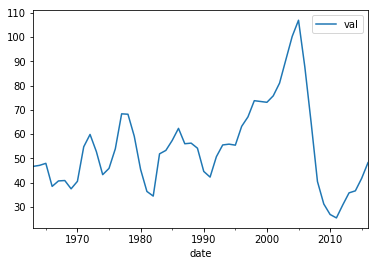

In [64]:
df.resample('A').mean().plot(y='val')

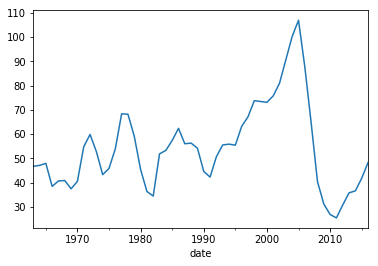

In [65]:
df['val'].resample('A').mean().plot() #BEST

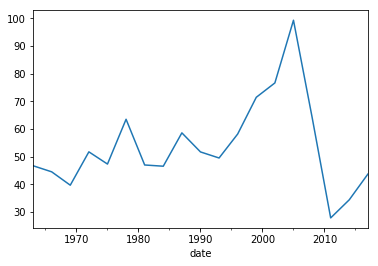

In [66]:
df['val'].resample('3A').mean().plot()

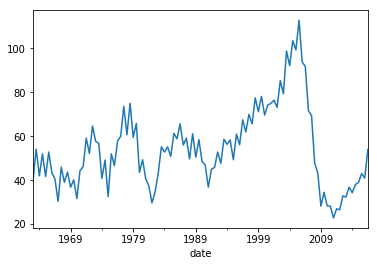

In [69]:
df['val'].resample('2Q').mean().plot() #twice a year

Notice that it's **December of every year**. That still looks like too much data, though. What if we back out to every decade?

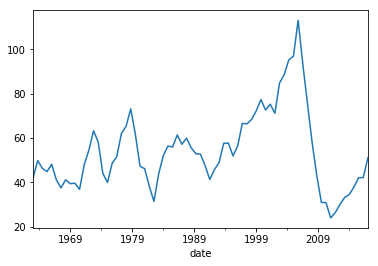

In [70]:
df['val'].resample('9M').mean().plot()

### Γραφήματα
Μπορούμε να φτιάξουμε πιο περίτεχνα γραφήματα!

In [71]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Όλα σε ένα plot

Το έχουμε ξαναδοκιμάσει, αλλά τώρα είναι ακόμα πιο ωραίο αυτό που θα δ=φτιάξουμε! Θυμηθείτε ότι σώζουμε το πρώτο plot ως `ax` και μετά το περνάμε στο επόμενο ως `ax=ax`.

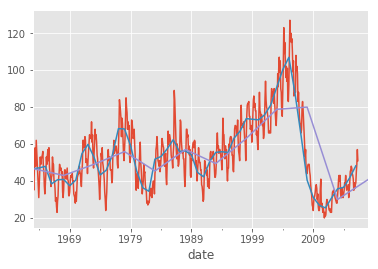

In [72]:
df['val'].plot()
df['val'].resample('A').mean().plot()
df['val'].resample('5A').mean().plot()

##  Πολλές φορές για να ερευνήσουμε ένα φαινόμενο κοιτάμε την εποχικότητα 

### Ποιοι ήταν οι 5 χειρότεροι μήνες?

In [74]:
df.sort_values(by='val').head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
2010-11-01,0,20.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-11-01
2011-01-01,0,21.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-01-01
2011-02-01,0,22.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-02-01
2010-08-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-08-01
2010-10-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-10-01


Φαίνεται σαν να υπάρχει ένας κύκλος κάθε χρόνο. Ίσως τα σπίτια πωλούνται το καλοκαίρι και όχι το χειμώνα; Για να γίνει αυτό δεν μπορούμε να χρησιμοποιήσουμε το resample, αλλά πρέπει να **ομάδοποιήσουμε ανά μήνα**

### Παίρνουμε το μήνα

In [75]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             8,  9, 10, 11, 12,  1,  2,  3,  4,  5],
           dtype='int64', name='date', length=641)

Δεν μπορούμε να ζητήσουμε τη στήλη ευρετηρίου/index ως "year" πια, αλλά μπορούμε να χρησιμοποιήσουμε μόνο `df.index`.

In [77]:
df.groupby(by=df.index.month).mean() #μπορούμε να ψάξουμε με μήνα, βδομάδα, μέρα

,is_adj,val,cat_indent
date,,,
1,0,47.685185,0
2,0,53.592593,0
3,0,62.685185,0
4,0,61.444444,0
5,0,61.129630,0
6,0,59.188679,0
7,0,56.735849,0
8,0,57.566038,0
9,0,52.037736,0


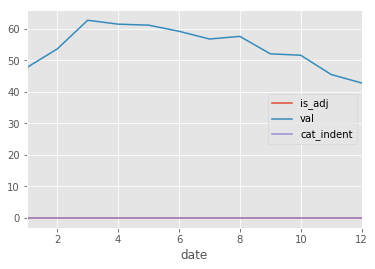

In [78]:
df.groupby(by=df.index.month).mean().plot()

In [79]:
df.groupby(by=df.index.dayofweek).mean() 

,is_adj,val,cat_indent
date,,,
0,0,54.086957,0
1,0,54.064516,0
2,0,53.956044,0
3,0,55.611111,0
4,0,53.967391,0
5,0,54.615385,0
6,0,54.173913,0


# Για να κάνουμε "zoum" στο γράφημα κάνουμε groupby, για μακριά resample 

Για να πάρετε το μήνα κάθε ημερομηνίας, είναι απλά `df.index.month`.

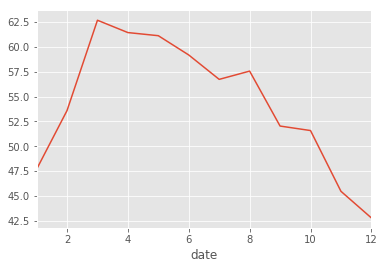

In [82]:
df['val'].groupby(by=df.index.month).mean().plot() 

### Κάνοντας groupby για την προβολή των δεδομένων ανά μήνα

Πρακτικά όταν κάνουμε το groupby, του λέμε **έφτιαξα τις ομάδες για σένα ήδη**. Και μετά ζητάμε τον μέσο όρο των σπιτιών που πουλήθηκαν κ.λπ. 

# Περισσότερες λεπτομέρειες

Μπορείτε επίσης να χρησιμοποιήσετε **max** και **min** και όλους τους άλλους κώδικες στατιστικής με το `.resample`. Για παράδειγμα, **ποιος είναι ο μεγαλύτερος αριθμός σπιτιών σε ένα δεδομένο έτος;**

In [84]:
df['val'].resample('A').sum() #σύνολο πουλημένων σπιτιών

date
1963-12-31     560.0
1964-12-31     565.0
1965-12-31     575.0
1966-12-31     461.0
1967-12-31     488.0
1968-12-31     490.0
1969-12-31     449.0
1970-12-31     486.0
1971-12-31     657.0
1972-12-31     718.0
1973-12-31     633.0
1974-12-31     519.0
1975-12-31     550.0
1976-12-31     647.0
1977-12-31     820.0
1978-12-31     818.0
1979-12-31     709.0
1980-12-31     545.0
1981-12-31     436.0
1982-12-31     413.0
1983-12-31     622.0
1984-12-31     639.0
1985-12-31     688.0
1986-12-31     748.0
1987-12-31     672.0
1988-12-31     675.0
1989-12-31     650.0
1990-12-31     535.0
1991-12-31     507.0
1992-12-31     608.0
1993-12-31     666.0
1994-12-31     670.0
1995-12-31     665.0
1996-12-31     758.0
1997-12-31     805.0
1998-12-31     885.0
1999-12-31     881.0
2000-12-31     877.0
2001-12-31     909.0
2002-12-31     972.0
2003-12-31    1088.0
2004-12-31    1203.0
2005-12-31    1283.0
2006-12-31    1052.0
2007-12-31     776.0
2008-12-31     485.0
2009-12-31     374.0
2010-12-

In [85]:
df['val'].resample('A').sum().sort_values(ascending=False).head(3)

date
2005-12-31    1283.0
2004-12-31    1203.0
2003-12-31    1088.0
Name: val, dtype: float64

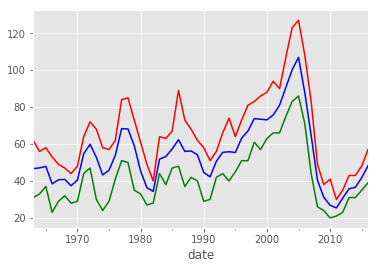

In [86]:
df['val'].resample('A').max().plot(color='red')
df['val'].resample('A').min().plot(color='green')
df['val'].resample('A').mean().plot(color='blue')